In [1]:
import os; import numpy as np; import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

os.chdir(r'E:\Dropbox\SEL\Python functions\OpenSim Analysis\d_Results Analysis')
from Utils import plot_MeanStd, Normalize_ExtLoad

In [8]:
## 조건별 데이터 입력

    # 피험자 번호 입력
# input_SUB = input("Which Number of SUB? : ")
# sub_name = 'SUB'+str(input_SUB)
sub_name = 'SUB1'

    # 데이터 로드 위치
root_dir = 'E:\\Dropbox\\SEL\\BOX\\OpenSim\\_Main_\\c_AddBio_Continous' #SUB1\\APP1\\trial10_15_1\\SO_Results\\
# "E:\Dropbox\SEL\BOX\OpenSim\_Main_\SUB1\UpDown_TrcMot\15_10_trial1_D1_ExtLoadAPP1.mot"
APP_li = ['APP1', 'APP2', 'APP4']
kg_bpm = '15_10'
UpDown_li = ['U', 'D']

save_dir = "E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(AddBiomech)"
os.makedirs(save_dir, exist_ok=True)

In [3]:
## Loading APP1 Loadcells Data
APP = 'APP1'

for UpDown in UpDown_li:
    save_name = sub_name +'_'+ APP +'_'+ UpDown +'_EHF'
    locals()[save_name] = Normalize_ExtLoad(root_dir, sub_name, APP, kg_bpm, UpDown)
    # savemat(root_dir +'\\'+ sub_name +'\\'+ APP +'\\'+ save_name +'.mat', locals()[save_name])

    Lx = 'hand_force3_vx'
    Ly = 'hand_force3_vy'
    Lz = 'hand_force3_vz'
    Rx = 'hand_force4_vx'
    Ry = 'hand_force4_vy'
    Rz = 'hand_force4_vz'
    
    save_name2 = 's1_a1_'+UpDown+'_EHF'
    locals()[save_name2 + '_Lx'] = -locals()[save_name][Lx]     # ML방향 부호 통일을 위해 x방향 왼손만 음수 처리 -> Lateral: (+), Medial: (-)
    locals()[save_name2 + '_Ly'] = locals()[save_name][Ly]      # Up: (+), Down: (-)
    locals()[save_name2 + '_Lz'] = -locals()[save_name][Lz]     # AP방향 부호 반전을 위해 z방향 양손 음수 처리 -> Anterior: (+), Posterior: (-) 
    locals()[save_name2 + '_Rx'] = locals()[save_name][Rx]
    locals()[save_name2 + '_Ry'] = locals()[save_name][Ry]
    locals()[save_name2 + '_Rz'] = -locals()[save_name][Rz]     # AP방향 부호 반전을 위해 z방향 양손 음수 처리 -> Anterior: (+), Posterior: (-)

    # LMx = 'hand_torque3_x'
    # LMy = 'hand_torque3_y'
    # LMz = 'hand_torque3_z'
    # RMx = 'hand_torque4_x'
    # RMy = 'hand_torque4_y'
    # RMz = 'hand_torque4_z'
    
    # locals()[save_name2 + '_LMx'] = -locals()[save_name][LMx]
    # locals()[save_name2 + '_LMy'] = -locals()[save_name][LMy]
    # locals()[save_name2 + '_LMz'] = -locals()[save_name][LMz]
    # locals()[save_name2 + '_RMx'] = -locals()[save_name][RMx]
    # locals()[save_name2 + '_RMy'] = -locals()[save_name][RMy]
    # locals()[save_name2 + '_RMz'] = -locals()[save_name][RMz]

In [4]:
## Loading APP1 Loadcells Data
APP = 'APP2'
g = np.array([0, -9.8065999999999995, 0])
Box_weight_li = np.array([6.82, 15.02])

if kg_bpm[0:2] =='15':
    Box_weight = Box_weight_li[1]
else:
    Box_weight = Box_weight_li[0]

for UpDown in UpDown_li:
    save_name = sub_name +'_'+ APP +'_'+ UpDown +'_acc'
    locals()[save_name] = Normalize_ExtLoad(root_dir, sub_name, APP, kg_bpm, UpDown)
    # savemat(root_dir +'\\'+ sub_name +'\\'+ APP +'\\'+ save_name +'.mat', locals()[save_name])

    
    save_name2 = 's1_a2_'+UpDown+'_EHF'
    locals()[save_name2 + '_Lx'] = -(-( (Box_weight/2)*(locals()[save_name]['Lx'] - g[0]) ))    # ML방향 부호 통일을 위해 x방향 왼손만 음수 처리 -> Lateral: (+), Medial: (-)
    locals()[save_name2 + '_Ly'] = -( (Box_weight/2)*(locals()[save_name]['Ly'] - g[1]) )       # Up: (+), Down: (-)
    locals()[save_name2 + '_Lz'] = -(-( (Box_weight/2)*(locals()[save_name]['Lz'] - g[2]) ))    # AP방향 부호 반전을 위해 z방향 양손 음수 처리 -> Anterior: (+), Posterior: (-)
    locals()[save_name2 + '_Rx'] = -( (Box_weight/2)*(locals()[save_name]['Rx'] - g[0]) )
    locals()[save_name2 + '_Ry'] = -( (Box_weight/2)*(locals()[save_name]['Ry'] - g[1]) )
    locals()[save_name2 + '_Rz'] = -(-( (Box_weight/2)*(locals()[save_name]['Rz'] - g[2]) ))    # AP방향 부호 반전을 위해 z방향 양손 음수 처리 -> Anterior: (+), Posterior: (-)



In [5]:
## Loading APP4 Estimated EHF Data
APP = 'APP4'

for UpDown in UpDown_li:
    save_name = sub_name +'_'+ APP +'_'+ UpDown +'_JR'
    locals()[save_name] = Normalize_ExtLoad(root_dir, sub_name, APP, kg_bpm, UpDown)
    # savemat(root_dir +'\\'+ sub_name +'\\'+ APP +'\\'+ save_name +'.mat', locals()[save_name])
    
    Lx = 'handle_l_on_box_15kg_half_l_in_ground_fx'
    Ly = 'handle_l_on_box_15kg_half_l_in_ground_fy'
    Lz = 'handle_l_on_box_15kg_half_l_in_ground_fz'
    Rx = 'handle_r_on_box_15kg_half_r_in_ground_fx'
    Ry = 'handle_r_on_box_15kg_half_r_in_ground_fy'
    Rz = 'handle_r_on_box_15kg_half_r_in_ground_fz'
    
    save_name2 = 's1_a4_'+UpDown+'_EHF'
    locals()[save_name2 + '_Lx'] = -(-locals()[save_name][Lx])      # ML방향 부호 통일을 위해 x방향 왼손만 음수 처리 -> Lateral: (+), Medial: (-)
    locals()[save_name2 + '_Ly'] = -locals()[save_name][Ly]         # Up: (+), Down: (-)
    locals()[save_name2 + '_Lz'] = -(-locals()[save_name][Lz])      # AP방향 부호 반전을 위해 z방향 양손 음수 처리 -> Anterior: (+), Posterior: (-)
    locals()[save_name2 + '_Rx'] = -locals()[save_name][Rx]
    locals()[save_name2 + '_Ry'] = -locals()[save_name][Ry]
    locals()[save_name2 + '_Rz'] = -(-locals()[save_name][Rz])      # AP방향 부호 반전을 위해 z방향 양손 음수 처리 -> Anterior: (+), Posterior: (-)
    
    # LMx = 'handle_l_on_box_15kg_half_l_in_ground_mx'
    # LMy = 'handle_l_on_box_15kg_half_l_in_ground_my'
    # LMz = 'handle_l_on_box_15kg_half_l_in_ground_mz'
    # RMx = 'handle_r_on_box_15kg_half_r_in_ground_mx'
    # RMy = 'handle_r_on_box_15kg_half_r_in_ground_my'
    # RMz = 'handle_r_on_box_15kg_half_r_in_ground_mz'
    
    # locals()[save_name2 + '_LMx'] = locals()[save_name][LMx]
    # locals()[save_name2 + '_LMy'] = locals()[save_name][LMy]
    # locals()[save_name2 + '_LMz'] = locals()[save_name][LMz]
    # locals()[save_name2 + '_RMx'] = locals()[save_name][RMx]
    # locals()[save_name2 + '_RMy'] = locals()[save_name][RMy]
    # locals()[save_name2 + '_RMz'] = locals()[save_name][RMz]

In [ ]:
# EHF 데이터 좌우 각각 csv로 저장

# ML
EHF_X_U_APP1_R = pd.DataFrame(locals()['s1_a1_U_EHF' + '_Rx'])
EHF_X_U_APP2_R = pd.DataFrame(locals()['s1_a2_U_EHF' + '_Rx'])
EHF_X_U_APP4_R = pd.DataFrame(locals()['s1_a4_U_EHF' + '_Rx'])
EHF_X_D_APP1_R = pd.DataFrame(locals()['s1_a1_D_EHF' + '_Rx'])
EHF_X_D_APP2_R = pd.DataFrame(locals()['s1_a2_D_EHF' + '_Rx'])
EHF_X_D_APP4_R = pd.DataFrame(locals()['s1_a4_D_EHF' + '_Rx'])
EHF_X_U_APP1_L = pd.DataFrame(locals()['s1_a1_U_EHF' + '_Lx'])
EHF_X_U_APP2_L = pd.DataFrame(locals()['s1_a2_U_EHF' + '_Lx'])
EHF_X_U_APP4_L = pd.DataFrame(locals()['s1_a4_U_EHF' + '_Lx'])
EHF_X_D_APP1_L = pd.DataFrame(locals()['s1_a1_D_EHF' + '_Lx'])
EHF_X_D_APP2_L = pd.DataFrame(locals()['s1_a2_D_EHF' + '_Lx'])
EHF_X_D_APP4_L = pd.DataFrame(locals()['s1_a4_D_EHF' + '_Lx'])

# Vertical
EHF_Y_U_APP1_R = pd.DataFrame(locals()['s1_a1_U_EHF' + '_Ry'])
EHF_Y_U_APP2_R = pd.DataFrame(locals()['s1_a2_U_EHF' + '_Ry'])
EHF_Y_U_APP4_R = pd.DataFrame(locals()['s1_a4_U_EHF' + '_Ry'])
EHF_Y_D_APP1_R = pd.DataFrame(locals()['s1_a1_D_EHF' + '_Ry'])
EHF_Y_D_APP2_R = pd.DataFrame(locals()['s1_a2_D_EHF' + '_Ry'])
EHF_Y_D_APP4_R = pd.DataFrame(locals()['s1_a4_D_EHF' + '_Ry'])
EHF_Y_U_APP1_L = pd.DataFrame(locals()['s1_a1_U_EHF' + '_Ly'])
EHF_Y_U_APP2_L = pd.DataFrame(locals()['s1_a2_U_EHF' + '_Ly'])
EHF_Y_U_APP4_L = pd.DataFrame(locals()['s1_a4_U_EHF' + '_Ly'])
EHF_Y_D_APP1_L = pd.DataFrame(locals()['s1_a1_D_EHF' + '_Ly'])
EHF_Y_D_APP2_L = pd.DataFrame(locals()['s1_a2_D_EHF' + '_Ly'])
EHF_Y_D_APP4_L = pd.DataFrame(locals()['s1_a4_D_EHF' + '_Ly'])

# AP
EHF_Z_U_APP1_R = pd.DataFrame(locals()['s1_a1_U_EHF' + '_Rz'])
EHF_Z_U_APP2_R = pd.DataFrame(locals()['s1_a2_U_EHF' + '_Rz'])
EHF_Z_U_APP4_R = pd.DataFrame(locals()['s1_a4_U_EHF' + '_Rz'])
EHF_Z_D_APP1_R = pd.DataFrame(locals()['s1_a1_D_EHF' + '_Rz'])
EHF_Z_D_APP2_R = pd.DataFrame(locals()['s1_a2_D_EHF' + '_Rz'])
EHF_Z_D_APP4_R = pd.DataFrame(locals()['s1_a4_D_EHF' + '_Rz'])
EHF_Z_U_APP1_L = pd.DataFrame(locals()['s1_a1_U_EHF' + '_Lz'])
EHF_Z_U_APP2_L = pd.DataFrame(locals()['s1_a2_U_EHF' + '_Lz'])
EHF_Z_U_APP4_L = pd.DataFrame(locals()['s1_a4_U_EHF' + '_Lz'])
EHF_Z_D_APP1_L = pd.DataFrame(locals()['s1_a1_D_EHF' + '_Lz'])
EHF_Z_D_APP2_L = pd.DataFrame(locals()['s1_a2_D_EHF' + '_Lz'])
EHF_Z_D_APP4_L = pd.DataFrame(locals()['s1_a4_D_EHF' + '_Lz'])


Each_Hand_dir = os.path.join(save_dir, "Each_Hand")
os.makedirs(Each_Hand_dir, exist_ok=True)
EHF_X_U_APP1_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_U_APP1_R.csv"))
EHF_X_U_APP2_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_U_APP2_R.csv"))
EHF_X_U_APP4_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_U_APP4_R.csv"))
EHF_X_D_APP1_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_D_APP1_R.csv"))
EHF_X_D_APP2_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_D_APP2_R.csv"))
EHF_X_D_APP4_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_D_APP4_R.csv"))
EHF_X_U_APP1_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_U_APP1_L.csv"))
EHF_X_U_APP2_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_U_APP2_L.csv"))
EHF_X_U_APP4_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_U_APP4_L.csv"))
EHF_X_D_APP1_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_D_APP1_L.csv"))
EHF_X_D_APP2_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_D_APP2_L.csv"))
EHF_X_D_APP4_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_X_{kg_bpm}_D_APP4_L.csv"))

EHF_Y_U_APP1_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_U_APP1_R.csv"))
EHF_Y_U_APP2_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_U_APP2_R.csv"))
EHF_Y_U_APP4_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_U_APP4_R.csv"))
EHF_Y_D_APP1_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_D_APP1_R.csv"))
EHF_Y_D_APP2_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_D_APP2_R.csv"))
EHF_Y_D_APP4_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_D_APP4_R.csv"))
EHF_Y_U_APP1_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_U_APP1_L.csv"))
EHF_Y_U_APP2_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_U_APP2_L.csv"))
EHF_Y_U_APP4_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_U_APP4_L.csv"))
EHF_Y_D_APP1_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_D_APP1_L.csv"))
EHF_Y_D_APP2_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_D_APP2_L.csv"))
EHF_Y_D_APP4_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Y_{kg_bpm}_D_APP4_L.csv"))

EHF_Z_U_APP1_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_U_APP1_R.csv"))
EHF_Z_U_APP2_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_U_APP2_R.csv"))
EHF_Z_U_APP4_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_U_APP4_R.csv"))
EHF_Z_D_APP1_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_D_APP1_R.csv"))
EHF_Z_D_APP2_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_D_APP2_R.csv"))
EHF_Z_D_APP4_R.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_D_APP4_R.csv"))
EHF_Z_U_APP1_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_U_APP1_L.csv"))
EHF_Z_U_APP2_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_U_APP2_L.csv"))
EHF_Z_U_APP4_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_U_APP4_L.csv"))
EHF_Z_D_APP1_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_D_APP1_L.csv"))
EHF_Z_D_APP2_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_D_APP2_L.csv"))
EHF_Z_D_APP4_L.T.to_csv(os.path.join( Each_Hand_dir, f"EHF_Z_{kg_bpm}_D_APP4_L.csv"))

In [ ]:
# # EHF 데이터 좌우 평균 csv로 저장

# # ML
# EHF_X_U_APP1 = pd.DataFrame((locals()['s1_a1_U_EHF' + '_Rx']+locals()['s1_a1_U_EHF' + '_Lx'])/2)
# EHF_X_U_APP2 = pd.DataFrame((locals()['s1_a2_U_EHF' + '_Rx']+locals()['s1_a2_U_EHF' + '_Lx'])/2)
# EHF_X_U_APP4 = pd.DataFrame((locals()['s1_a4_U_EHF' + '_Rx']+locals()['s1_a4_U_EHF' + '_Lx'])/2)
# EHF_X_D_APP1 = pd.DataFrame((locals()['s1_a1_D_EHF' + '_Rx']+locals()['s1_a1_D_EHF' + '_Lx'])/2)
# EHF_X_D_APP2 = pd.DataFrame((locals()['s1_a2_D_EHF' + '_Rx']+locals()['s1_a2_D_EHF' + '_Lx'])/2)
# EHF_X_D_APP4 = pd.DataFrame((locals()['s1_a4_D_EHF' + '_Rx']+locals()['s1_a4_D_EHF' + '_Lx'])/2)

# # Vertical
# EHF_Y_U_APP1 = pd.DataFrame((locals()['s1_a1_U_EHF' + '_Ry']+locals()['s1_a1_U_EHF' + '_Ly'])/2)
# EHF_Y_U_APP2 = pd.DataFrame((locals()['s1_a2_U_EHF' + '_Ry']+locals()['s1_a2_U_EHF' + '_Ly'])/2)
# EHF_Y_U_APP4 = pd.DataFrame((locals()['s1_a4_U_EHF' + '_Ry']+locals()['s1_a4_U_EHF' + '_Ly'])/2)
# EHF_Y_D_APP1 = pd.DataFrame((locals()['s1_a1_D_EHF' + '_Ry']+locals()['s1_a1_D_EHF' + '_Ly'])/2)
# EHF_Y_D_APP2 = pd.DataFrame((locals()['s1_a2_D_EHF' + '_Ry']+locals()['s1_a2_D_EHF' + '_Ly'])/2)
# EHF_Y_D_APP4 = pd.DataFrame((locals()['s1_a4_D_EHF' + '_Ry']+locals()['s1_a4_D_EHF' + '_Ly'])/2)

# # AP
# EHF_Z_U_APP1 = pd.DataFrame((locals()['s1_a1_U_EHF' + '_Rz']+locals()['s1_a1_U_EHF' + '_Lz'])/2)
# EHF_Z_U_APP2 = pd.DataFrame((locals()['s1_a2_U_EHF' + '_Rz']+locals()['s1_a2_U_EHF' + '_Lz'])/2)
# EHF_Z_U_APP4 = pd.DataFrame((locals()['s1_a4_U_EHF' + '_Rz']+locals()['s1_a4_U_EHF' + '_Lz'])/2)
# EHF_Z_D_APP1 = pd.DataFrame((locals()['s1_a1_D_EHF' + '_Rz']+locals()['s1_a1_D_EHF' + '_Lz'])/2)
# EHF_Z_D_APP2 = pd.DataFrame((locals()['s1_a2_D_EHF' + '_Rz']+locals()['s1_a2_D_EHF' + '_Lz'])/2)
# EHF_Z_D_APP4 = pd.DataFrame((locals()['s1_a4_D_EHF' + '_Rz']+locals()['s1_a4_D_EHF' + '_Lz'])/2)


# # EHF_X_U_APP1.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_X_"+kg_bpm+"_U_APP1" +".csv")
# # EHF_X_U_APP2.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_X_"+kg_bpm+"_U_APP2" +".csv")
# # EHF_X_U_APP4.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_X_"+kg_bpm+"_U_APP4" +".csv")
# # EHF_X_D_APP1.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_X_"+kg_bpm+"_D_APP1" +".csv")
# # EHF_X_D_APP2.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_X_"+kg_bpm+"_D_APP2" +".csv")
# # EHF_X_D_APP4.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_X_"+kg_bpm+"_D_APP4" +".csv")

# # EHF_Y_U_APP1.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Y_"+kg_bpm+"_U_APP1" +".csv")
# # EHF_Y_U_APP2.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Y_"+kg_bpm+"_U_APP2" +".csv")
# # EHF_Y_U_APP4.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Y_"+kg_bpm+"_U_APP4" +".csv")
# # EHF_Y_D_APP1.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Y_"+kg_bpm+"_D_APP1" +".csv")
# # EHF_Y_D_APP2.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Y_"+kg_bpm+"_D_APP2" +".csv")
# # EHF_Y_D_APP4.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Y_"+kg_bpm+"_D_APP4" +".csv")

# # EHF_Z_U_APP1.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Z_"+kg_bpm+"_U_APP1" +".csv")
# # EHF_Z_U_APP2.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Z_"+kg_bpm+"_U_APP2" +".csv")
# # EHF_Z_U_APP4.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Z_"+kg_bpm+"_U_APP4" +".csv")
# # EHF_Z_D_APP1.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Z_"+kg_bpm+"_D_APP1" +".csv")
# # EHF_Z_D_APP2.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Z_"+kg_bpm+"_D_APP2" +".csv")
# # EHF_Z_D_APP4.to_csv("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\SUB1(ASB)\\"+ "EHF_Z_"+kg_bpm+"_D_APP4" +".csv")

In [18]:
# EHF 데이터 좌우 각각 Resultant force 구해서 csv로 저장
Resultant_dir = os.path.join(save_dir,"Each_Hand","Resultant")
os.makedirs(Resultant_dir, exist_ok=True)

# R
EHF_U_APP1_R = pd.DataFrame(np.sqrt((locals()['s1_a1_U_EHF' + '_Rx']**2+locals()['s1_a1_U_EHF' + '_Ry']**2+locals()['s1_a1_U_EHF' + '_Rz']**2)))
EHF_U_APP2_R = pd.DataFrame(np.sqrt((locals()['s1_a2_U_EHF' + '_Rx']**2+locals()['s1_a2_U_EHF' + '_Ry']**2+locals()['s1_a2_U_EHF' + '_Rz']**2)))
EHF_U_APP4_R = pd.DataFrame(np.sqrt((locals()['s1_a4_U_EHF' + '_Rx']**2+locals()['s1_a4_U_EHF' + '_Ry']**2+locals()['s1_a4_U_EHF' + '_Rz']**2)))
EHF_D_APP1_R = pd.DataFrame(np.sqrt((locals()['s1_a1_D_EHF' + '_Rx']**2+locals()['s1_a1_D_EHF' + '_Ry']**2+locals()['s1_a1_D_EHF' + '_Rz']**2)))
EHF_D_APP2_R = pd.DataFrame(np.sqrt((locals()['s1_a2_D_EHF' + '_Rx']**2+locals()['s1_a2_D_EHF' + '_Ry']**2+locals()['s1_a2_D_EHF' + '_Rz']**2)))
EHF_D_APP4_R = pd.DataFrame(np.sqrt((locals()['s1_a4_D_EHF' + '_Rx']**2+locals()['s1_a4_D_EHF' + '_Ry']**2+locals()['s1_a4_D_EHF' + '_Rz']**2)))

EHF_U_APP1_R.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_U_APP1_R" +".csv"))
EHF_U_APP2_R.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_U_APP2_R" +".csv"))
EHF_U_APP4_R.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_U_APP4_R" +".csv"))
EHF_D_APP1_R.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_D_APP1_R" +".csv"))
EHF_D_APP2_R.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_D_APP2_R" +".csv"))
EHF_D_APP4_R.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_D_APP4_R" +".csv"))

# L
EHF_U_APP1_L = pd.DataFrame(np.sqrt((locals()['s1_a1_U_EHF' + '_Lx']**2+locals()['s1_a1_U_EHF' + '_Ly']**2+locals()['s1_a1_U_EHF' + '_Lz']**2)))
EHF_U_APP2_L = pd.DataFrame(np.sqrt((locals()['s1_a2_U_EHF' + '_Lx']**2+locals()['s1_a2_U_EHF' + '_Ly']**2+locals()['s1_a2_U_EHF' + '_Lz']**2)))
EHF_U_APP4_L = pd.DataFrame(np.sqrt((locals()['s1_a4_U_EHF' + '_Lx']**2+locals()['s1_a4_U_EHF' + '_Ly']**2+locals()['s1_a4_U_EHF' + '_Lz']**2)))
EHF_D_APP1_L = pd.DataFrame(np.sqrt((locals()['s1_a1_D_EHF' + '_Lx']**2+locals()['s1_a1_D_EHF' + '_Ly']**2+locals()['s1_a1_D_EHF' + '_Lz']**2)))
EHF_D_APP2_L = pd.DataFrame(np.sqrt((locals()['s1_a2_D_EHF' + '_Lx']**2+locals()['s1_a2_D_EHF' + '_Ly']**2+locals()['s1_a2_D_EHF' + '_Lz']**2)))
EHF_D_APP4_L = pd.DataFrame(np.sqrt((locals()['s1_a4_D_EHF' + '_Lx']**2+locals()['s1_a4_D_EHF' + '_Ly']**2+locals()['s1_a4_D_EHF' + '_Lz']**2)))

EHF_U_APP1_L.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_U_APP1_L" +".csv"))
EHF_U_APP2_L.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_U_APP2_L" +".csv"))
EHF_U_APP4_L.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_U_APP4_L" +".csv"))
EHF_D_APP1_L.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_D_APP1_L" +".csv"))
EHF_D_APP2_L.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_D_APP2_L" +".csv"))
EHF_D_APP4_L.T.to_csv(os.path.join(Resultant_dir, "EHF_"+kg_bpm+"_D_APP4_L" +".csv"))


## RMSE

In [15]:

def Calculate_RMSE(measured_df, predicted_df, intervals):
    """
    측정값과 추정값 사이의 구간별 RMSE 평균과 표준편차를 계산하는 함수.

    Parameters:
    - measured_df (pd.DataFrame): 측정된 데이터 (반복 횟수 x 시간 스텝).
    - predicted_df (pd.DataFrame): 추정된 데이터 (반복 횟수 x 시간 스텝).
    - intervals (list of tuple): 시간 구간을 나타내는 (start, end) 튜플의 리스트.

    Returns:
    - result_dict (dict): 각 구간별 RMSE 평균과 표준편차를 담은 딕셔너리.
    """
    result_dict = {'Interval': [], 'RMSE_Mean': [], 'RMSE_Std': []}

    for start, end in intervals:
        # 해당 구간의 데이터 추출
        measured_segment = measured_df.iloc[:, start:end].to_numpy()
        predicted_segment = predicted_df.iloc[:, start:end].to_numpy()

        # 구간별 RMSE 계산 (반복별 RMSE)
        rmse_values = np.sqrt(np.mean((measured_segment - predicted_segment) ** 2, axis=1))

        # 결과 저장
        result_dict['Interval'].append(f"{start}-{end}")
        result_dict['RMSE_Mean'].append(np.mean(rmse_values))
        result_dict['RMSE_Std'].append(np.std(rmse_values))

    return result_dict

# intervals 정의: 4개 구간 (0-25%, 25-50%, 50-75%, 75-100%)
n_points = 101  # 총 시간 스텝 수 (예제)
intervals = [(0, n_points // 4), 
             (n_points // 4, n_points // 2), 
             (n_points // 2, 3 * n_points // 4), 
             (3 * n_points // 4, n_points)]

# 사용 예시
# # 예제 데이터: 측정값과 추정값 (각각 10회 반복 측정)
# measured_df = pd.DataFrame(np.random.rand(10, n_points) * 100)  # 임의의 측정값
# predicted_df = measured_df + pd.DataFrame(np.random.randn(10, n_points) * 10)  # 임의의 추정값

# RMSE 계산
# rmse_results = Calculate_RMSE(measured_df, predicted_df, intervals)
# print("구간별 RMSE:", rmse_results)



In [16]:
RMSE_dir = os.path.join(Resultant_dir,"RMSE")
os.makedirs(RMSE_dir, exist_ok=True)

RMSE_EHF_U_APP2_R = Calculate_RMSE(EHF_U_APP1_R, EHF_U_APP2_R ,intervals)
RMSE_EHF_U_APP4_R = Calculate_RMSE(EHF_U_APP1_R, EHF_U_APP4_R ,intervals)
RMSE_EHF_D_APP2_R = Calculate_RMSE(EHF_D_APP1_R, EHF_D_APP2_R ,intervals)
RMSE_EHF_D_APP4_R = Calculate_RMSE(EHF_D_APP1_R, EHF_D_APP4_R ,intervals)

RMSE_EHF_U_APP2_L = Calculate_RMSE(EHF_U_APP1_L, EHF_U_APP2_L ,intervals)
RMSE_EHF_U_APP4_L = Calculate_RMSE(EHF_U_APP1_L, EHF_U_APP4_L ,intervals)
RMSE_EHF_D_APP2_L = Calculate_RMSE(EHF_D_APP1_L, EHF_D_APP2_L ,intervals)
RMSE_EHF_D_APP4_L = Calculate_RMSE(EHF_D_APP1_L, EHF_D_APP4_L ,intervals)

RMSE_EHF_U_APP2_R = pd.DataFrame(RMSE_EHF_U_APP2_R)
RMSE_EHF_U_APP2_R.to_csv(os.path.join(RMSE_dir,'RMSE_EHF_U_APP2_R.csv'))
RMSE_EHF_U_APP4_R = pd.DataFrame(RMSE_EHF_U_APP4_R)
RMSE_EHF_U_APP4_R.to_csv(os.path.join(RMSE_dir,'RMSE_EHF_U_APP4_R.csv'))
RMSE_EHF_D_APP2_R = pd.DataFrame(RMSE_EHF_D_APP2_R)
RMSE_EHF_D_APP2_R.to_csv(os.path.join(RMSE_dir,'RMSE_EHF_D_APP2_R.csv'))
RMSE_EHF_D_APP4_R = pd.DataFrame(RMSE_EHF_D_APP4_R)
RMSE_EHF_D_APP4_R.to_csv(os.path.join(RMSE_dir,'RMSE_EHF_D_APP4_R.csv'))

RMSE_EHF_U_APP2_L = pd.DataFrame(RMSE_EHF_U_APP2_L)
RMSE_EHF_U_APP2_L.to_csv(os.path.join(RMSE_dir,'RMSE_EHF_U_APP2_L.csv'))
RMSE_EHF_U_APP4_L = pd.DataFrame(RMSE_EHF_U_APP4_L)
RMSE_EHF_U_APP4_L.to_csv(os.path.join(RMSE_dir,'RMSE_EHF_U_APP4_L.csv'))
RMSE_EHF_D_APP2_L = pd.DataFrame(RMSE_EHF_D_APP2_L)
RMSE_EHF_D_APP2_L.to_csv(os.path.join(RMSE_dir,'RMSE_EHF_D_APP2_L.csv'))
RMSE_EHF_D_APP4_L = pd.DataFrame(RMSE_EHF_D_APP4_L)
RMSE_EHF_D_APP4_L.to_csv(os.path.join(RMSE_dir,'RMSE_EHF_D_APP4_L.csv'))

## SPM

In [7]:

# Vertical
EHF_Y_U_APP1 = (locals()['s1_a1_U_EHF' + '_Ry']+locals()['s1_a1_U_EHF' + '_Ly'])/2
EHF_Y_U_APP2 = (locals()['s1_a2_U_EHF' + '_Ry']+locals()['s1_a2_U_EHF' + '_Ly'])/2
EHF_Y_U_APP4 = (locals()['s1_a4_U_EHF' + '_Ry']+locals()['s1_a4_U_EHF' + '_Ly'])/2
EHF_Y_D_APP1 = (locals()['s1_a1_D_EHF' + '_Ry']+locals()['s1_a1_D_EHF' + '_Ly'])/2
EHF_Y_D_APP2 = (locals()['s1_a2_D_EHF' + '_Ry']+locals()['s1_a2_D_EHF' + '_Ly'])/2
EHF_Y_D_APP4 = (locals()['s1_a4_D_EHF' + '_Ry']+locals()['s1_a4_D_EHF' + '_Ly'])/2

In [8]:
EHF_Y_U = np.vstack((EHF_Y_U_APP1, EHF_Y_U_APP2, EHF_Y_U_APP4))
EHF_Y_D = np.vstack((EHF_Y_D_APP1, EHF_Y_D_APP2, EHF_Y_D_APP4))

In [9]:
A = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
              2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
              3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])

SUBJ = np.array([0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,
                 0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,
                 0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9])

In [22]:
import spm1d
%matplotlib tk

#(1) ANOVA:
alpha        = 0.05
equal_var    = True
F            = spm1d.stats.anova1(EHF_Y_D, A, equal_var)
Frm          = spm1d.stats.anova1rm(EHF_Y_D, A, SUBJ, equal_var)
Fi           = F.inference(alpha)
Firm         = Frm.inference(alpha)




#(2) Plot:
plt.close('all')
plt.figure( figsize=(8, 3.5) )
ax0     = plt.axes( (0.1, 0.15, 0.35, 0.8) )
ax1     = plt.axes((0.55,0.15,0.35,0.8))
### plot mean subject trajectories:
ax0.plot(EHF_Y_D[A==1].T, 'k')
ax0.plot(EHF_Y_D[A==2].T, 'r')
ax0.plot(EHF_Y_D[A==3].T, 'b')
### plot SPM results:
Firm.plot(ax=ax1, color='r', facecolor=(0.8,0.3,0.3), label='Within-subjects analysis')
Fi.plot(ax=ax1, label='Between-subjects analysis')
ax1.legend(fontsize=8)
# plt.show()

In [23]:
nTests = 3
p_critical = spm1d.util.p_critical_bonf(alpha, nTests)

In [34]:
t12   = spm1d.stats.ttest2(EHF_Y_D_APP1, EHF_Y_D_APP2, equal_var=False)
t13   = spm1d.stats.ttest2(EHF_Y_D_APP1, EHF_Y_D_APP4, equal_var=False)
t23   = spm1d.stats.ttest2(EHF_Y_D_APP2, EHF_Y_D_APP4, equal_var=False)

In [35]:
t12i  = t12.inference(alpha=p_critical, two_tailed=True)
t13i  = t13.inference(alpha=p_critical, two_tailed=True)
t23i  = t23.inference(alpha=p_critical, two_tailed=True)

In [36]:
#(2) Plot:
plt.close('all')
fig = plt.figure( figsize=(8, 3.5) )
# ax0     = plt.axes( (0.1, 0.15, 0.35, 0.8) )
# ax1     = plt.axes((0.55,0.15,0.35,0.8))
# ax2     = plt.axes((1.0,0.15,0.35,0.8))

ax0     = fig.add_subplot(131)
ax1     = fig.add_subplot(132)
ax2     = fig.add_subplot(133)

### plot SPM results:
t12i.plot(ax=ax0, label='APP1-APP2')
t13i.plot(ax=ax1, label='APP1-APP3')
t23i.plot(ax=ax2, label='APP2-APP3')

## EHF Results Comparison

### RL Mean

In [6]:

## EHF plot (LowerBody)
# RL mean

%matplotlib tk

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd((locals()['s1_a1_U_EHF' + '_Rx']+locals()['s1_a1_U_EHF' + '_Lx'])/2, Label='Loadcell', color='black')
graph2 = plot_MeanStd((locals()['s1_a2_U_EHF' + '_Rx']+locals()['s1_a2_U_EHF' + '_Lx'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_U_EHF' + '_Rx']+locals()['s1_a4_U_EHF' + '_Lx'])/2, Label='AddBox(No Const.)', color='blue')
plt.title('Lifting\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax2 = fig.add_subplot(323)
graph1 = plot_MeanStd((locals()['s1_a1_U_EHF' + '_Ry']+locals()['s1_a1_U_EHF' + '_Ly'])/2, Label='Loadcell', color='black')
graph2 = plot_MeanStd((locals()['s1_a2_U_EHF' + '_Ry']+locals()['s1_a2_U_EHF' + '_Ly'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_U_EHF' + '_Ry']+locals()['s1_a4_U_EHF' + '_Ly'])/2, Label='AddBox(No Const.)', color='blue')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph1 = plot_MeanStd((locals()['s1_a1_U_EHF' + '_Rz']+locals()['s1_a1_U_EHF' + '_Lz'])/2, Label='Loadcell', color='black')
graph2 = plot_MeanStd((locals()['s1_a2_U_EHF' + '_Rz']+locals()['s1_a2_U_EHF' + '_Lz'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_U_EHF' + '_Rz']+locals()['s1_a4_U_EHF' + '_Lz'])/2, Label='AddBox(No Const.)', color='blue')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd((locals()['s1_a1_D_EHF' + '_Rx']+locals()['s1_a1_D_EHF' + '_Lx'])/2, Label='Loadcell', color='black')
graph2 = plot_MeanStd((locals()['s1_a2_D_EHF' + '_Rx']+locals()['s1_a2_D_EHF' + '_Lx'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_D_EHF' + '_Rx']+locals()['s1_a4_D_EHF' + '_Lx'])/2, Label='AddBox(No Const.)', color='blue')
plt.title('Lowering\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph1 = plot_MeanStd((locals()['s1_a1_D_EHF' + '_Ry']+locals()['s1_a1_D_EHF' + '_Ly'])/2, Label='Loadcell', color='black')
graph2 = plot_MeanStd((locals()['s1_a2_D_EHF' + '_Ry']+locals()['s1_a2_D_EHF' + '_Ly'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_D_EHF' + '_Ry']+locals()['s1_a4_D_EHF' + '_Ly'])/2, Label='AddBox(No Const.)', color='blue')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax6 = fig.add_subplot(326)
graph1 = plot_MeanStd((locals()['s1_a1_D_EHF' + '_Rz']+locals()['s1_a1_D_EHF' + '_Lz'])/2, Label='Loadcell', color='black')
graph2 = plot_MeanStd((locals()['s1_a2_D_EHF' + '_Rz']+locals()['s1_a2_D_EHF' + '_Lz'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_D_EHF' + '_Rz']+locals()['s1_a4_D_EHF' + '_Lz'])/2, Label='AddBox(No Const.)', color='blue')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

plt.suptitle('External Hand Force (Measurement vs Estimation)', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ

    # 피규어 저장 위치
savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\"
                + sub_name +'_'+ kg_bpm +r" EHF (Mean)"+".tif")

plt.savefig(savefig_name)

### RMSE

### Resultant Lifting Right hand

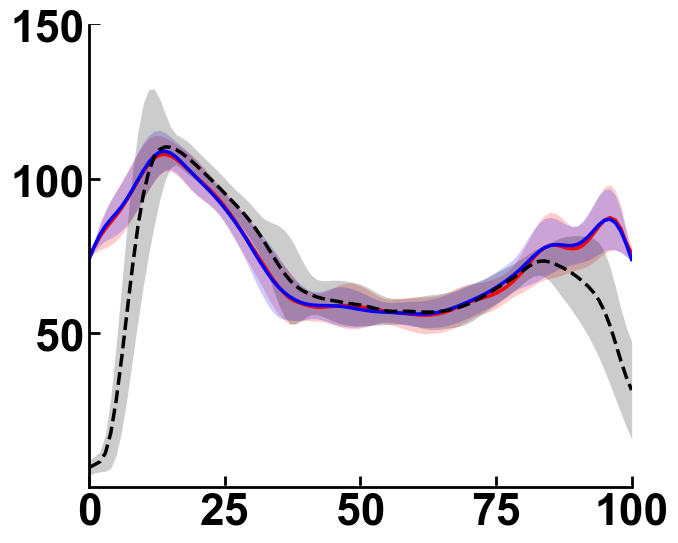

In [16]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline
# %matplotlib tk


fig = plt.figure(figsize=(7,6))
# fig = plt.figure(figsize=(7,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')
Arial = fm.FontProperties(fname='C:\\Windows\\Fonts\\arial.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = Arial.get_name()
plt.rcParams['font.size'] = 32.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8


ax1 = fig.add_subplot(111)

plt.rcParams['lines.linewidth'] = '2.5'
plt.rcParams['lines.linestyle'] = '-'
# graph4 = plt.plot(np.zeros(101), color='black')
graph4 = plt.plot(np.ones(101)*0.01, color='white')
graph2 = plot_MeanStd(EHF_U_APP2_R, Label='Joomuk', color='red')
graph3 = plot_MeanStd(EHF_U_APP4_R, Label='AddBox(No Const.)', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd(EHF_U_APP1_R, Label='Measured', color='black')

# graph5 = plt.plot(np.ones(101)*-30, c='white')
graph6 = plt.plot(np.ones(101)*150, c='white')

# plt.ylabel(r'Resultant EHF (N)', fontsize=36 )
# plt.xlabel('Time (%)', fontsize=36 )

    # 피규어 저장 위치
savefig_name = os.path.join(result_path,"Figures", f'{sub_name}_{kg_bpm}_Resultant_EHF_Lifting(Right_hand).tif')
os.makedirs(os.path.join(result_path,"Figures"),exist_ok=True)
plt.savefig(savefig_name)

### Resultant Lowering Right hand

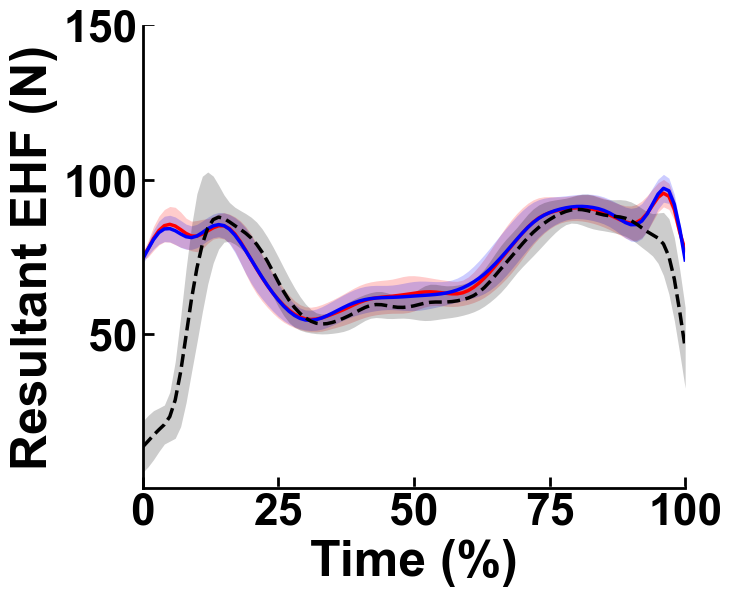

In [11]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline


fig = plt.figure(figsize=(7,6))
# fig = plt.figure(figsize=(7,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')
Arial = fm.FontProperties(fname='C:\\Windows\\Fonts\\arial.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = Arial.get_name()
plt.rcParams['font.size'] = 32.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8


ax1 = fig.add_subplot(111)

plt.rcParams['lines.linewidth'] = '2.5'
plt.rcParams['lines.linestyle'] = '-'
# graph4 = plt.plot(np.zeros(101), color='black')
graph4 = plt.plot(np.ones(101)*0.01, color='white')
graph2 = plot_MeanStd(EHF_D_APP2_R, Label='Joomuk', color='red')
graph3 = plot_MeanStd(EHF_D_APP4_R, Label='AddBox(No Const.)', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd(EHF_D_APP1_R, Label='Measured', color='black')

# graph5 = plt.plot(np.ones(101)*-30, c='white')
graph6 = plt.plot(np.ones(101)*150, c='white')

plt.ylabel(r'Resultant EHF (N)', fontsize=36 )
plt.xlabel('Time (%)', fontsize=36 )

    # 피규어 저장 위치
savefig_name = os.path.join(result_path,"Figures", f'{sub_name}_{kg_bpm}_Resultant_EHF_Lowering(Right_hand).tif')
os.makedirs(os.path.join(result_path,"Figures"),exist_ok=True)
plt.savefig(savefig_name)

### L

### Force

In [ ]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline


fig = plt.figure(figsize=(7,7))
# fig = plt.figure(figsize=(7,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = TimesNewRoman.get_name()
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6


ax1 = fig.add_subplot(111)

plt.rcParams['lines.linestyle'] = '-'
graph4 = plt.plot(np.zeros(101), color='black')
graph2 = plot_MeanStd((locals()['s1_a2_U_EHF' + '_Rx']+locals()['s1_a2_U_EHF' + '_Lx'])/2, Label='Joomuk', color='red')
graph2 = plot_MeanStd((locals()['s1_a2_U_EHF' + '_Rx']+locals()['s1_a2_U_EHF' + '_Lx'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_U_EHF' + '_Rx']+locals()['s1_a4_U_EHF' + '_Lx'])/2, Label='AddBox(No Const.)', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd((locals()['s1_a1_U_EHF' + '_Rx']+locals()['s1_a1_U_EHF' + '_Lx'])/2, Label='Loadcell', color='black')
graph5 = plt.plot(np.ones(101)*-30, c='white')
graph6 = plt.plot(np.ones(101)*30, c='white')

plt.ylabel(r'Force (N)', fontsize=28 )
plt.xlabel('Time (%)', fontsize=28 )

    # 피규어 저장 위치
# savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\Each\\"
#                 + sub_name +'_'+ kg_bpm +r" Mean EHF (15_10_U_ML)"+".tif")

plt.savefig(savefig_name)

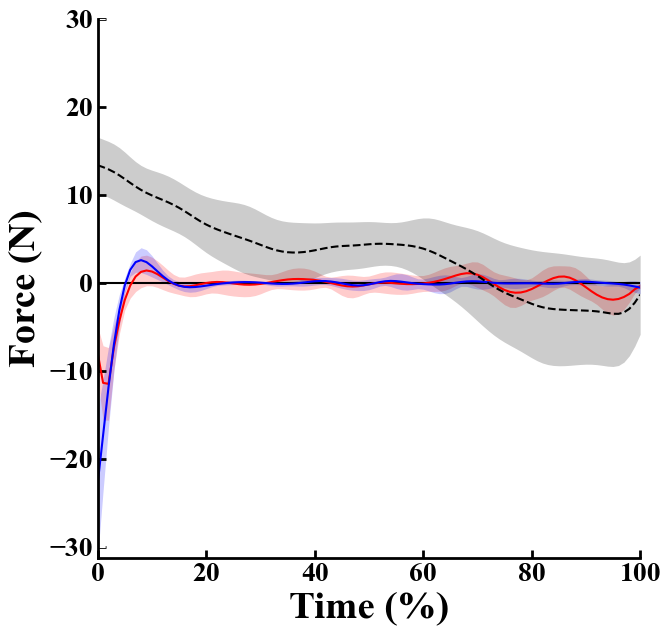

In [8]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline


fig = plt.figure(figsize=(7,7))
# fig = plt.figure(figsize=(7,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = TimesNewRoman.get_name()
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6


ax1 = fig.add_subplot(111)

plt.rcParams['lines.linestyle'] = '-'
graph4 = plt.plot(np.zeros(101), color='black')
graph2 = plot_MeanStd((locals()['s1_a2_D_EHF' + '_Rx']+locals()['s1_a2_D_EHF' + '_Lx'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_D_EHF' + '_Rx']+locals()['s1_a4_D_EHF' + '_Lx'])/2, Label='AddBox(No Const.)', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd((locals()['s1_a1_D_EHF' + '_Rx']+locals()['s1_a1_D_EHF' + '_Lx'])/2, Label='Loadcell', color='black')
graph5 = plt.plot(np.ones(101)*-30, c='white')
graph6 = plt.plot(np.ones(101)*30, c='white')

plt.ylabel(r'Force (N)', fontsize=28 )
plt.xlabel('Time (%)', fontsize=28 )

    # 피규어 저장 위치
savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\Each\\"
                + sub_name +'_'+ kg_bpm +r" Mean EHF (15_10_D_ML)"+".tif")

plt.savefig(savefig_name)

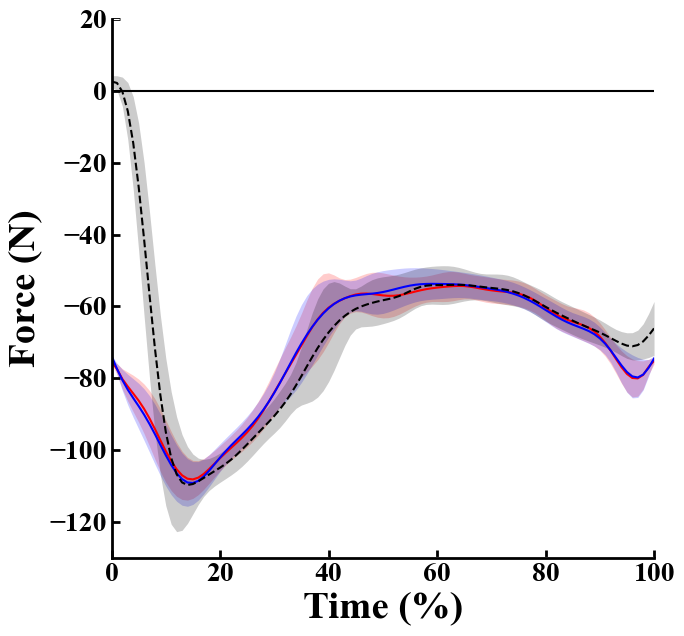

In [9]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline


fig = plt.figure(figsize=(7,7))
# fig = plt.figure(figsize=(7,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = TimesNewRoman.get_name()
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6


ax1 = fig.add_subplot(111)

plt.rcParams['lines.linestyle'] = '-'
graph4 = plt.plot(np.zeros(101), color='black')
graph2 = plot_MeanStd((locals()['s1_a2_U_EHF' + '_Ry']+locals()['s1_a2_U_EHF' + '_Ly'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_U_EHF' + '_Ry']+locals()['s1_a4_U_EHF' + '_Ly'])/2, Label='AddBox(No Const.)', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd((locals()['s1_a1_U_EHF' + '_Ry']+locals()['s1_a1_U_EHF' + '_Ly'])/2, Label='Loadcell', color='black')
graph5 = plt.plot(np.ones(101)*-130, c='white')
graph6 = plt.plot(np.ones(101)*20, c='white')

plt.ylabel(r'Force (N)', fontsize=28 )
plt.xlabel('Time (%)', fontsize=28 )

    # 피규어 저장 위치
savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\Each\\"
                + sub_name +'_'+ kg_bpm +r" Mean EHF (15_10_U_Vert)"+".tif")

plt.savefig(savefig_name)

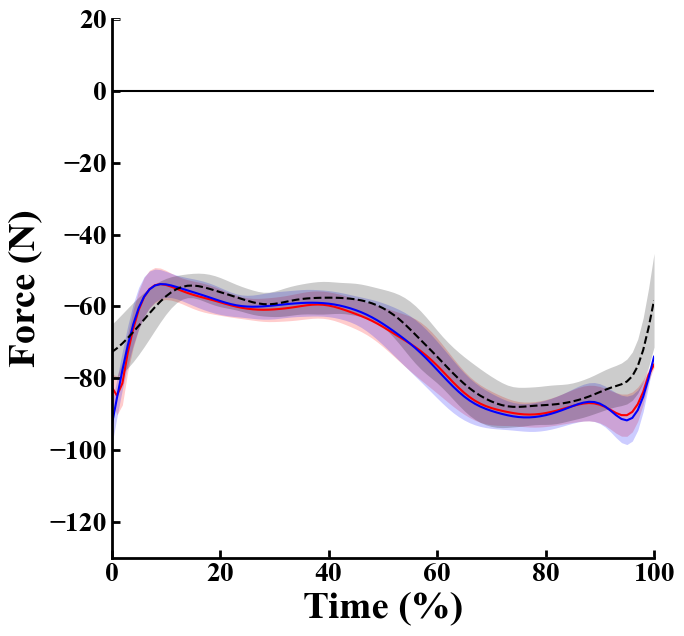

In [10]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline


fig = plt.figure(figsize=(7,7))
# fig = plt.figure(figsize=(7,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = TimesNewRoman.get_name()
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6


ax1 = fig.add_subplot(111)

plt.rcParams['lines.linestyle'] = '-'
graph4 = plt.plot(np.zeros(101), color='black')
graph2 = plot_MeanStd((locals()['s1_a2_D_EHF' + '_Ry']+locals()['s1_a2_D_EHF' + '_Ly'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_D_EHF' + '_Ry']+locals()['s1_a4_D_EHF' + '_Ly'])/2, Label='AddBox(No Const.)', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd((locals()['s1_a1_D_EHF' + '_Ry']+locals()['s1_a1_D_EHF' + '_Ly'])/2, Label='Loadcell', color='black')
graph5 = plt.plot(np.ones(101)*-130, c='white')
graph6 = plt.plot(np.ones(101)*20, c='white')

plt.ylabel(r'Force (N)', fontsize=28 )
plt.xlabel('Time (%)', fontsize=28 )

    # 피규어 저장 위치
savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\Each\\"
                + sub_name +'_'+ kg_bpm +r" Mean EHF (15_10_D_Vert)"+".tif")

plt.savefig(savefig_name)

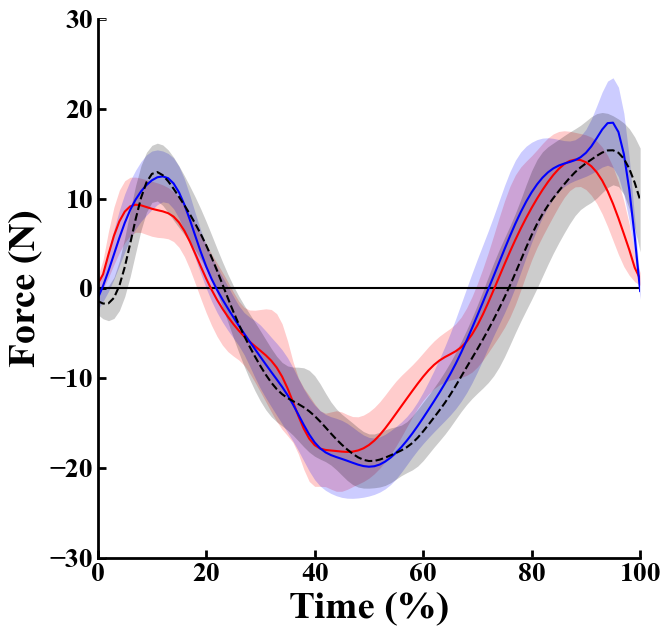

In [14]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline


fig = plt.figure(figsize=(7,7))
# fig = plt.figure(figsize=(7,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = TimesNewRoman.get_name()
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6


ax1 = fig.add_subplot(111)

plt.rcParams['lines.linestyle'] = '-'
graph4 = plt.plot(np.zeros(101), color='black')
graph2 = plot_MeanStd((locals()['s1_a2_U_EHF' + '_Rz']+locals()['s1_a2_U_EHF' + '_Lz'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_U_EHF' + '_Rz']+locals()['s1_a4_U_EHF' + '_Lz'])/2, Label='AddBox(No Const.)', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd((locals()['s1_a1_U_EHF' + '_Rz']+locals()['s1_a1_U_EHF' + '_Lz'])/2, Label='Loadcell', color='black')
graph5 = plt.plot(np.ones(101)*-30, c='white')
graph6 = plt.plot(np.ones(101)*30, c='white')

plt.ylabel(r'Force (N)', fontsize=28 )
plt.xlabel('Time (%)', fontsize=28 )

    # 피규어 저장 위치
savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\Each\\"
                + sub_name +'_'+ kg_bpm +r" Mean EHF (15_10_U_AP)"+".tif")

plt.savefig(savefig_name)

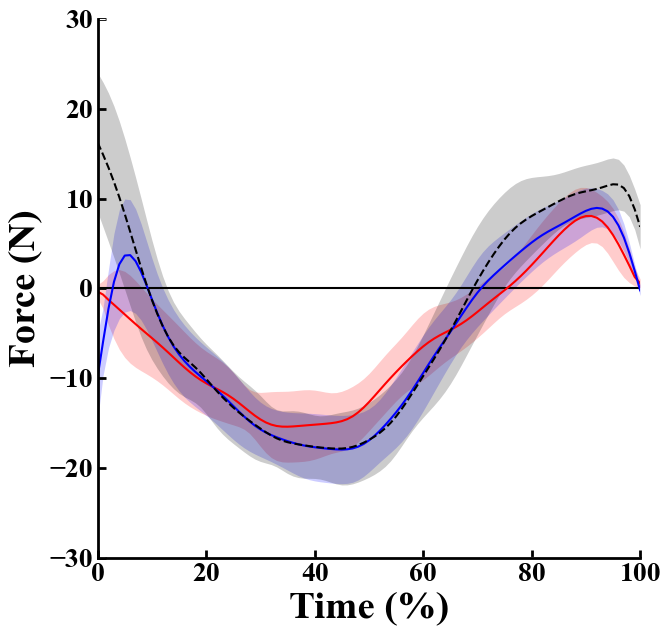

In [13]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# print(font_file_path_list) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

%matplotlib inline


fig = plt.figure(figsize=(7,7))
# fig = plt.figure(figsize=(7,7), dpi=600)
# fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0
plt.rcParams['axes.ymargin'] = 0.0

TimesNewRoman = fm.FontProperties(fname='C:\\Windows\\Fonts\\times.ttf')

# font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = TimesNewRoman.get_name()
plt.rcParams['font.size'] = 20.0
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['mathtext.fontset'] = 'stix'

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6


ax1 = fig.add_subplot(111)

plt.rcParams['lines.linestyle'] = '-'
graph4 = plt.plot(np.zeros(101), color='black')
graph2 = plot_MeanStd((locals()['s1_a2_D_EHF' + '_Rz']+locals()['s1_a2_D_EHF' + '_Lz'])/2, Label='Joomuk', color='red')
graph3 = plot_MeanStd((locals()['s1_a4_D_EHF' + '_Rz']+locals()['s1_a4_D_EHF' + '_Lz'])/2, Label='AddBox(No Const.)', color='blue')
plt.rcParams['lines.linestyle'] = '--'
graph1 = plot_MeanStd((locals()['s1_a1_D_EHF' + '_Rz']+locals()['s1_a1_D_EHF' + '_Lz'])/2, Label='Loadcell', color='black')
graph5 = plt.plot(np.ones(101)*-30, c='white')
graph6 = plt.plot(np.ones(101)*30, c='white')

plt.ylabel(r'Force (N)', fontsize=28 )
plt.xlabel('Time (%)', fontsize=28 )

    # 피규어 저장 위치
savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\Each\\"
                + sub_name +'_'+ kg_bpm +r" Mean EHF (15_10_D_AP)"+".tif")

plt.savefig(savefig_name)

In [7]:

## EHF plot (LowerBody)
# mean diff.

%matplotlib tk

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(((locals()['s1_a1_U_EHF' + '_Rx']+locals()['s1_a1_U_EHF' + '_Lx'])/2)-((locals()['s1_a2_U_EHF' + '_Rx']+locals()['s1_a2_U_EHF' + '_Lx'])/2), Label='APP1-2', color='red')
graph2 = plot_MeanStd(((locals()['s1_a1_U_EHF' + '_Rx']+locals()['s1_a1_U_EHF' + '_Lx'])/2)-((locals()['s1_a4_U_EHF' + '_Rx']+locals()['s1_a4_U_EHF' + '_Lx'])/2), Label='APP1-3', color='blue')
plt.title('Lifting\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax2 = fig.add_subplot(323)
graph1 = plot_MeanStd(((locals()['s1_a1_U_EHF' + '_Ry']+locals()['s1_a1_U_EHF' + '_Ly'])/2)-((locals()['s1_a2_U_EHF' + '_Ry']+locals()['s1_a2_U_EHF' + '_Ly'])/2), Label='APP1-2', color='red')
graph2 = plot_MeanStd(((locals()['s1_a1_U_EHF' + '_Ry']+locals()['s1_a1_U_EHF' + '_Ly'])/2)-((locals()['s1_a4_U_EHF' + '_Ry']+locals()['s1_a4_U_EHF' + '_Ly'])/2), Label='APP1-3', color='blue')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph1 = plot_MeanStd(((locals()['s1_a1_U_EHF' + '_Rz']+locals()['s1_a1_U_EHF' + '_Lz'])/2)-((locals()['s1_a2_U_EHF' + '_Rz']+locals()['s1_a2_U_EHF' + '_Lz'])/2), Label='APP1-2', color='red')
graph2 = plot_MeanStd(((locals()['s1_a1_U_EHF' + '_Rz']+locals()['s1_a1_U_EHF' + '_Lz'])/2)-((locals()['s1_a4_U_EHF' + '_Rz']+locals()['s1_a4_U_EHF' + '_Lz'])/2), Label='APP1-3', color='blue')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(((locals()['s1_a1_D_EHF' + '_Rx']+locals()['s1_a1_D_EHF' + '_Lx'])/2)-((locals()['s1_a2_D_EHF' + '_Rx']+locals()['s1_a2_D_EHF' + '_Lx'])/2), Label='APP1-2', color='red')
graph2 = plot_MeanStd(((locals()['s1_a1_D_EHF' + '_Rx']+locals()['s1_a1_D_EHF' + '_Lx'])/2)-((locals()['s1_a4_D_EHF' + '_Rx']+locals()['s1_a4_D_EHF' + '_Lx'])/2), Label='APP1-3', color='blue')
plt.title('Lowering\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph1 = plot_MeanStd(((locals()['s1_a1_D_EHF' + '_Ry']+locals()['s1_a1_D_EHF' + '_Ly'])/2)-((locals()['s1_a2_D_EHF' + '_Ry']+locals()['s1_a2_D_EHF' + '_Ly'])/2), Label='APP1-2', color='red')
graph2 = plot_MeanStd(((locals()['s1_a1_D_EHF' + '_Ry']+locals()['s1_a1_D_EHF' + '_Ly'])/2)-((locals()['s1_a4_D_EHF' + '_Ry']+locals()['s1_a4_D_EHF' + '_Ly'])/2), Label='APP1-3', color='blue')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

ax6 = fig.add_subplot(326)
graph1 = plot_MeanStd(((locals()['s1_a1_D_EHF' + '_Rz']+locals()['s1_a1_D_EHF' + '_Lz'])/2)-((locals()['s1_a2_D_EHF' + '_Rz']+locals()['s1_a2_D_EHF' + '_Lz'])/2), Label='APP1-2', color='red')
graph2 = plot_MeanStd(((locals()['s1_a1_D_EHF' + '_Rz']+locals()['s1_a1_D_EHF' + '_Lz'])/2)-((locals()['s1_a4_D_EHF' + '_Rz']+locals()['s1_a4_D_EHF' + '_Lz'])/2), Label='APP1-3', color='blue')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
# plt.legend(loc='lower right')
plt.grid()

plt.suptitle('External Hand Force (Measurement vs Estimation)', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ

    # 피규어 저장 위치
savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\"
                + sub_name +'_'+ kg_bpm +r" EHF (Diff)"+".tif")

plt.savefig(savefig_name)

In [6]:

## EHF plot (LowerBody)
# RRRRRRRR

%matplotlib tk

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Rx'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Rx'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Rx'], Label='AddBox(No Const.)', color='blue')
plt.title('Lifting\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax2 = fig.add_subplot(323)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Ry'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Ry'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Ry'], Label='AddBox(No Const.)', color='blue')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Rz'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Rz'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Rz'], Label='AddBox(No Const.)', color='blue')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Rx'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Rx'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Rx'], Label='AddBox(No Const.)', color='blue')
plt.title('Lowering\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Ry'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Ry'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Ry'], Label='AddBox(No Const.)', color='blue')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax6 = fig.add_subplot(326)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Rz'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Rz'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Rz'], Label='AddBox(No Const.)', color='blue')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('External Hand Force (Measurement vs Estimation)', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ

    # 피규어 저장 위치
savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\"
                + sub_name +'_'+ kg_bpm +r" EHF (R)"+".tif")

plt.savefig(savefig_name)

In [7]:

## EHF plot (LowerBody)
# LLLLLLLL

%matplotlib tk

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Lx'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Lx'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Lx'], Label='AddBox(No Const.)', color='blue')
plt.title('Lifting\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax2 = fig.add_subplot(323)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Ly'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Ly'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Ly'], Label='AddBox(No Const.)', color='blue')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Lz'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Lz'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Lz'], Label='AddBox(No Const.)', color='blue')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Lx'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Lx'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Lx'], Label='AddBox(No Const.)', color='blue')
plt.title('Lowering\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Ly'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Ly'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Ly'], Label='AddBox(No Const.)', color='blue')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax6 = fig.add_subplot(326)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Lz'], Label='Loadcell', color='black')
graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Lz'], Label='Joomuk', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Lz'], Label='AddBox(No Const.)', color='blue')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('External Hand Force (Measurement vs Estimation)', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ

    # 피규어 저장 위치
savefig_name = ("E:\\Dropbox\\SEL\\BOX\\Analysis\\EHF\\"+ sub_name +"\\Figures\\"
                + sub_name +'_'+ kg_bpm +r" EHF (L)"+".tif")

plt.savefig(savefig_name)

Right Hand Force

In [13]:

## EHF plot (LowerBody)

%matplotlib tk

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Rx'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Rx'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Rx'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_Rx'] - locals()['s1_a4_U_EHF' + '_Rx']), Label='Diff.', color='black')
plt.title('Lifting\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax2 = fig.add_subplot(323)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Ry'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Ry'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Ry'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_Ry'] - locals()['s1_a4_U_EHF' + '_Ry']), Label='Diff.', color='black')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Rz'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Rz'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Rz'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_Rz'] - locals()['s1_a4_U_EHF' + '_Rz']), Label='Diff.', color='black')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Rx'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Rx'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Rx'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_Rx'] - locals()['s1_a4_D_EHF' + '_Rx']), Label='Diff.', color='black')
plt.title('Lowering\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Ry'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Ry'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Ry'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_Ry'] - locals()['s1_a4_D_EHF' + '_Ry']), Label='Diff.', color='black')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax6 = fig.add_subplot(326)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Rz'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Rz'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Rz'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_Rz'] - locals()['s1_a4_D_EHF' + '_Rz']), Label='Diff.', color='black')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('External Hand Force (Loadcell vs Box Kinematics)', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ


# plt.savefig(savefig_name)

Text(0.5, 0.98, 'External Hand Force (Loadcell vs Box Kinematics)')

Left Hand Force

In [22]:

## EHF plot (LowerBody)

%matplotlib tk

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Lx'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Lx'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Lx'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_Lx'] - locals()['s1_a4_U_EHF' + '_Lx']), Label='Diff.', color='black')
plt.title('Lifting\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax2 = fig.add_subplot(323)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Ly'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Ly'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Ly'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_Ly'] - locals()['s1_a4_U_EHF' + '_Ly']), Label='Diff.', color='black')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_Lz'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_Lz'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_Lz'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_Lz'] - locals()['s1_a4_U_EHF' + '_Lz']), Label='Diff.', color='black')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Lx'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Lx'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Lx'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_Lx'] - locals()['s1_a4_D_EHF' + '_Lx']), Label='Diff.', color='black')
plt.title('Lowering\nFx(ML)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Ly'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Ly'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Ly'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_Ly'] - locals()['s1_a4_D_EHF' + '_Ly']), Label='Diff.', color='black')
plt.title('Fy(Vert.)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax6 = fig.add_subplot(326)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_Lz'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_Lz'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_Lz'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_Lz'] - locals()['s1_a4_D_EHF' + '_Lz']), Label='Diff.', color='black')
plt.title('Fz(AP)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Force(N)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('External Hand Force (Loadcell vs Box Kinematics)', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ


# plt.savefig(savefig_name)

Text(0.5, 0.98, 'External Hand Force (Loadcell vs Box Kinematics)')

### Moment

Right Hand Moment

In [36]:

## EHF plot (LowerBody)

%matplotlib tk

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_RMx'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_RMx'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_RMx'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_RMx'] - locals()['s1_a4_U_EHF' + '_RMx']), Label='Diff.', color='black')
plt.title('Lifting\nMx(ML axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax2 = fig.add_subplot(323)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_RMy'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_RMy'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_RMy'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_RMy'] - locals()['s1_a4_U_EHF' + '_RMy']), Label='Diff.', color='black')
plt.title('My(Vert. axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_RMz'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_RMz'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_RMz'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_RMz'] - locals()['s1_a4_U_EHF' + '_RMz']), Label='Diff.', color='black')
plt.title('Mz(AP axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_RMx'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_RMx'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_RMx'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_RMx'] - locals()['s1_a4_D_EHF' + '_RMx']), Label='Diff.', color='black')
plt.title('Lowering\nMx(ML axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_RMy'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_RMy'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_RMy'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_RMy'] - locals()['s1_a4_D_EHF' + '_RMy']), Label='Diff.', color='black')
plt.title('My(Vert. axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax6 = fig.add_subplot(326)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_RMz'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_RMz'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_RMz'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_RMz'] - locals()['s1_a4_D_EHF' + '_RMz']), Label='Diff.', color='black')
plt.title('Mz(AP axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('External Hand Moment (Loadcell vs Box Kinematics)', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ


# plt.savefig(savefig_name)

Text(0.5, 0.98, 'External Hand Moment (Loadcell vs Box Kinematics)')

Left Hand Moment

In [34]:

## EHF plot (LowerBody)

%matplotlib tk

fig = plt.figure(figsize=(12,20))
fig.subplots_adjust(left=0.1)
plt.rcParams['axes.xmargin'] = 0.0

ax1 = fig.add_subplot(321)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_LMx'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_LMx'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_LMx'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_LMx'] - locals()['s1_a4_U_EHF' + '_LMx']), Label='Diff.', color='black')
plt.title('Lifting\nMx(ML axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax2 = fig.add_subplot(323)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_LMy'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_LMy'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_LMy'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_LMy'] - locals()['s1_a4_U_EHF' + '_LMy']), Label='Diff.', color='black')
plt.title('My(Vert. axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax3 = fig.add_subplot(325)
graph1 = plot_MeanStd(locals()['s1_a1_U_EHF' + '_LMz'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_U_EHF' + '_LMz'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_U_EHF' + '_LMz'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_U_EHF' + '_LMz'] - locals()['s1_a4_U_EHF' + '_LMz']), Label='Diff.', color='black')
plt.title('Mz(AP axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax4 = fig.add_subplot(322)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_LMx'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_LMx'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_LMx'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_LMx'] - locals()['s1_a4_D_EHF' + '_LMx']), Label='Diff.', color='black')
plt.title('Lowering\nMx(ML axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax5 = fig.add_subplot(324)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_LMy'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_LMy'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_LMy'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_LMy'] - locals()['s1_a4_D_EHF' + '_LMy']), Label='Diff.', color='black')
plt.title('My(Vert. axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

ax6 = fig.add_subplot(326)
graph1 = plot_MeanStd(locals()['s1_a1_D_EHF' + '_LMz'], Label='Loadcell', color='red')
# graph2 = plot_MeanStd(locals()['s1_a2_D_EHF' + '_LMz'], Label='APP2', color='red')
graph3 = plot_MeanStd(locals()['s1_a4_D_EHF' + '_LMz'], Label='AddBox(No Const.)', color='blue')

graph4 = plot_MeanStd(abs(locals()['s1_a1_D_EHF' + '_LMz'] - locals()['s1_a4_D_EHF' + '_LMz']), Label='Diff.', color='black')
plt.title('Mz(AP axis)', fontsize=20)
plt.xlabel('Time(%)', fontsize=13)
# plt.ylabel('Moment(Nm)', fontsize=15)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle('External Hand Moment (Loadcell vs Box Kinematics)', weight=1, fontsize = 25)  # suptitle -> sub ㄴㄴ sup ㅇㅇ


# plt.savefig(savefig_name)

Text(0.5, 0.98, 'External Hand Moment (Loadcell vs Box Kinematics)')

## 각각 EHF Results Comparison

### 15_10_U_ML

### 15_10_D_ML

### 15_10_U_vertical

### 15_10_D_Vertical

### 15_10_U_AP

### 15_10_D_AP